In [1]:
import glob
import shutil
import numpy as np
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pickle
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [43]:
# for file in glob.glob("./data/earth_observation_group/annual/tmp/*"):
#     year = file.split("/")[-1].split(".")[0][-4:]
#     new_location = "./data/earth_observation_group/annual/{}/".format(year)
#     shutil.copy(file, new_location)

In [44]:
# for year in np.arange(2013, 2021+1):
#     for file in glob.glob("/home/asatya/tmp3/{}/*".format(year)):
#         if ".csv" in file:
#             dst = "/home/asatya/master-thesis/data/earth_observation_group/annual/{}".format(year)
# #             dst = "/home/asatya/tmp3/{}".format(year)
# #             os.makedirs(dst, exist_ok=True)
#             shutil.copy(file, dst)

In [45]:
def get_driver():
    options = webdriver.ChromeOptions() ;
    prefs = {"download.default_directory" : "./data/new_ntl_data/"}
    #example: prefs = {"download.default_directory" : "C:\Tutorial\down"};
    options.add_experimental_option("prefs",prefs);
    driver = webdriver.Chrome(executable_path='./chromedriver',chrome_options=options);
    return driver

def login(url):
    driver.get(url)
    

def download_ntl(url):
    try:

        driver.get(url)

        gotit= driver.find_element_by_id('accept-cookie-notification')

        gotit.click()

        downloadcsv= driver.find_element_by_css_selector('.icon-csv')

        downloadcsv.click()

        time.sleep(5)    

        driver.close()

    except:

         print("Invalid URL")

In [46]:
url = "https://eogdata.mines.edu/wwwdata/dmsp/monthly_composites/by_year/1992/"

In [47]:
driver = get_driver()

/tmp/ipykernel_26968/2880605792.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver',chrome_options=options);
/tmp/ipykernel_26968/2880605792.py:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='./chromedriver',chrome_options=options);


In [48]:
driver.get(url)

In [50]:
table = driver.find_element(By.TAG_NAME, "tbody")
data = []
for row in table.find_elements(By.TAG_NAME, "tr"):
    if row.get_attribute("class") in ["even", "odd"]:
        tmp_data = []
        for col in row.find_elements(By.TAG_NAME, "td"):
            if col.get_attribute("class") == "indexcolname":
                href_link = col.find_elements(By.TAG_NAME, "a")[0]
                href_link.click()
                break
        break
#         data.append(tmp_data)
        

In [51]:
driver.find_element(By.ID, "username").send_keys("satya.ankur@gmail.com")
driver.find_element(By.ID, "password").send_keys("music television")
driver.find_element(By.ID, "kc-login").click()

In [33]:
with open("./data/missing_filenames_viirs.pkl", "rb") as f:
    data = pickle.load(f)

In [34]:
data

{2013: ['SVDNB_npp_20130101-20130131_global_vcmcfg_v10_c201605121529.avg_rade9h.tif',
  'SVDNB_npp_20130201-20130228_global_vcmcfg_v10_c201605131247.avg_rade9h.tif',
  'SVDNB_npp_20130301-20130331_global_vcmcfg_v10_c201605131250.avg_rade9h.tif',
  'SVDNB_npp_20130401-20130430_global_vcmcfg_v10_c201605131251.avg_rade9h.tif',
  'SVDNB_npp_20130501-20130531_global_vcmcfg_v10_c201605131256.avg_rade9h.tif',
  'SVDNB_npp_20130601-20130630_global_vcmcfg_v10_c201605131304.avg_rade9h.tif',
  'SVDNB_npp_20130701-20130731_global_vcmcfg_v10_c201605131305.avg_rade9h.tif',
  'SVDNB_npp_20130801-20130831_global_vcmcfg_v10_c201605131312.avg_rade9h.tif',
  'SVDNB_npp_20130901-20130930_global_vcmcfg_v10_c201605131325.avg_rade9h.tif',
  'SVDNB_npp_20131001-20131031_global_vcmcfg_v10_c201605131331.avg_rade9h.tif',
  'SVDNB_npp_20131101-20131130_global_vcmcfg_v10_c201605131332.avg_rade9h.tif',
  'SVDNB_npp_20131201-20131231_global_vcmcfg_v10_c201605131341.avg_rade9h.tif'],
 2014: ['SVDNB_npp_20140101-20140

In [35]:
a = np.array([[1,2,3], [4,5,6]])

In [50]:
a = {"india": [1,2], "ban": [4,5], "china": [10, 45]}
b = np.array(list(a.values()))
df = pd.DataFrame()
df["region"] = a.keys()
df["col1"] = b[:, 0]
df["col2"] = b[:, 1]


In [51]:
df

,region,col1,col2
0,india,1,2
1,ban,4,5
2,china,10,45


In [49]:
b[:, 1]

array([ 2,  5, 45])

In [1]:
from get_radiance_sum import *

In [2]:
ntl_filepath = "./data/earth_observation_group/monthly/2008/02/F16_20080201_20080229.cloud2.light1.marginal0.line_screened.avg_vis.tif"
region_shapefilepath = "./data/country_geometry/all_country/ne_10m_admin_0_countries.shp"
north_limit = 75.0
south_limit = -65.0
n_procs=1

In [3]:
# ntl_filepath = "./data/earth_observation_group/monthly/2010/01/F18_20100101_20100131.cloud2.light1.marginal0.glare2.line_screened.avg_vis.tif"

In [4]:
df = run(ntl_filepath, region_shapefilepath, north_limit, south_limit, n_procs)

Getting country geometries ...
Getting country mappings ...


Process: 1:   0%|                                                                                                                                                                   | 0/204 [00:00<?, ?it/s]

region:  IDN


Process: 1:   0%|                                                                                                                                                                   | 0/204 [00:00<?, ?it/s]

region:  MYS


Process: 1:   0%|                                                                                                                                                                   | 0/204 [00:00<?, ?it/s]

region:  CHL


Process: 1:   0%|                                                                                                                                                                   | 0/204 [00:00<?, ?it/s]

region:  BOL


Process: 1:   0%|                                                                                                                                                                   | 0/204 [00:00<?, ?it/s]

region:  PER


Process: 1:   0%|                                                                                                                                                                   | 0/204 [00:00<?, ?it/s]

region:  ARG


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  GB1


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  CYP


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  IND


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  CH1


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  IS1


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  LBN


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  ETH


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  SDS


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  SOM


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  KEN


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  MWI


Process: 1:   3%|████▌                                                                                                                                                      | 6/204 [00:00<00:03, 49.93it/s]

region:  TZA


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  SYR


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  SOL


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  FR1


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  SUR


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  GUY


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  KOR


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  PRK


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  MAR


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  SAH


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  CRI


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  NIC


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  COG


Process: 1:   9%|█████████████▌                                                                                                                                            | 18/204 [00:00<00:02, 86.83it/s]

region:  COD


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  BTN


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  UKR


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  BLR


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  NAM


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  ZAF


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  NL1


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  OMN


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  UZB


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  KA1


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  TJK


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  LTU


Process: 1:  15%|███████████████████████▏                                                                                                                                 | 31/204 [00:00<00:01, 105.48it/s]

region:  BRA


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  URY


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  MNG


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  CZE


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  DEU


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  EST


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  LVA


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  SWE


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  FI1


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  VNM


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  KHM


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  LUX


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  ARE


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  BEL


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  GEO


Process: 1:  21%|████████████████████████████████▎                                                                                                                        | 43/204 [00:00<00:01, 100.77it/s]

region:  MKD


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  ALB


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  AZE


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  KOS


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  TUR


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  ESP


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  LAO


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  KGZ


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  ARM


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  DN1


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  LBY


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  TUN


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  ROU


Process: 1:  28%|███████████████████████████████████████████▌                                                                                                             | 58/204 [00:00<00:01, 116.89it/s]

region:  HUN


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  SVK


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  POL


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  IRL


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  GRC


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  ZMB


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  SLE


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  GIN


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  LBR


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  CAF


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  SDN


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  DJI


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  ERI


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  AUT


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  IRQ


Process: 1:  35%|█████████████████████████████████████████████████████▎                                                                                                   | 71/204 [00:00<00:01, 120.62it/s]

region:  ITA


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  CHE


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  IRN


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  LIE


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  CIV


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  SRB


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  MLI


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  SEN


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  NGA


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  BEN


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  AGO


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  HRV


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  SVN


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  QAT


Process: 1:  42%|████████████████████████████████████████████████████████████████▌                                                                                        | 86/204 [00:00<00:00, 127.09it/s]

region:  SAU


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  BWA


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  ZWE


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  PAK


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  BGR


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  THA


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  SMR


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  HTI


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  DOM


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  TCD


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  KWT


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  SLV


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  GTM


Process: 1:  49%|██████████████████████████████████████████████████████████████████████████▌                                                                             | 100/204 [00:00<00:00, 127.00it/s]

region:  TLS


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:00<00:00, 125.22it/s]

region:  BRN


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:00<00:00, 125.22it/s]

region:  MCO


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:00<00:00, 125.22it/s]

region:  DZA


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:00<00:00, 125.22it/s]

region:  MOZ


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  SWZ


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  BDI


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  RWA


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  MMR


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  BGD


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  AND


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  AFG


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  MNE


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  BIH


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  UGA


Process: 1:  55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 113/204 [00:01<00:00, 125.22it/s]

region:  CU1


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  HND


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  ECU


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  COL


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  PRY


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  BRI


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  PRT


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  MDA


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  TKM


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  JOR


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  NPL


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  LSO


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  CMR


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  GAB


Process: 1:  63%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 128/204 [00:01<00:00, 130.13it/s]

region:  NER


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  BFA


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  TGO


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  GHA


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  GNB


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  US1


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  MEX


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  BLZ


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  PAN


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  VEN


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  PNG


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  EGY


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  YEM


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  MRT


Process: 1:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 142/204 [00:01<00:00, 131.29it/s]

region:  GNQ


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  GMB


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  VAT
Error: tuple index out of range while evaluating radiance sum.


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  CYN


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  CNM


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  KAS


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  SPI


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  BRT


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  AU1


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  FJI


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  NZ1


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  MDG


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  PHL


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  LKA


Process: 1:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 156/204 [00:01<00:00, 131.42it/s]

region:  BHS


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  TWN


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  JPN


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  ISL


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  SYC


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  MHL


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  TTO


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  GRD


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  VCT


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  BRB


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  LCA


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  DMA


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  ATG


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  KNA


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  JAM


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  MUS


Process: 1:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 170/204 [00:01<00:00, 116.85it/s]

region:  COM


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  STP


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  CPV


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  MLT


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  SGP


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  TON


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  WSM


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  SLB


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  TUV


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  MDV


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  NRU


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  FSM


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  VUT


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  PLW


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  BHR


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  PGA


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  BJN


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  SER


Process: 1:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 186/204 [00:01<00:00, 127.63it/s]

region:  SCR


Process: 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:01<00:00, 123.61it/s]


total regions:  204


In [42]:
annual_df = pd.read_csv("./data/earth_observation_group/annual/2010/countries_ntl_sum_F18.csv")
annual_df.head(2)

,Region Code,annual_ntl_sum
0,IDN,2682094.8
1,MYS,1502646.4


In [43]:
with open("./data/country_num_pixels.pkl", "rb") as f:
    country_pixels_data = pickle.load(f)

In [44]:
all_avg_values = []
for i, row in annual_df.iterrows():
    num_pixels = country_pixels_data[row["Region Code"]]
    avg_value = None
    if num_pixels is not None:
        avg_value = row["annual_ntl_sum"]/num_pixels
    all_avg_values.append(avg_value)
    
annual_df["avg_value"] = all_avg_values
annual_df.sort_values(by=["Region Code"], inplace=True)

[]

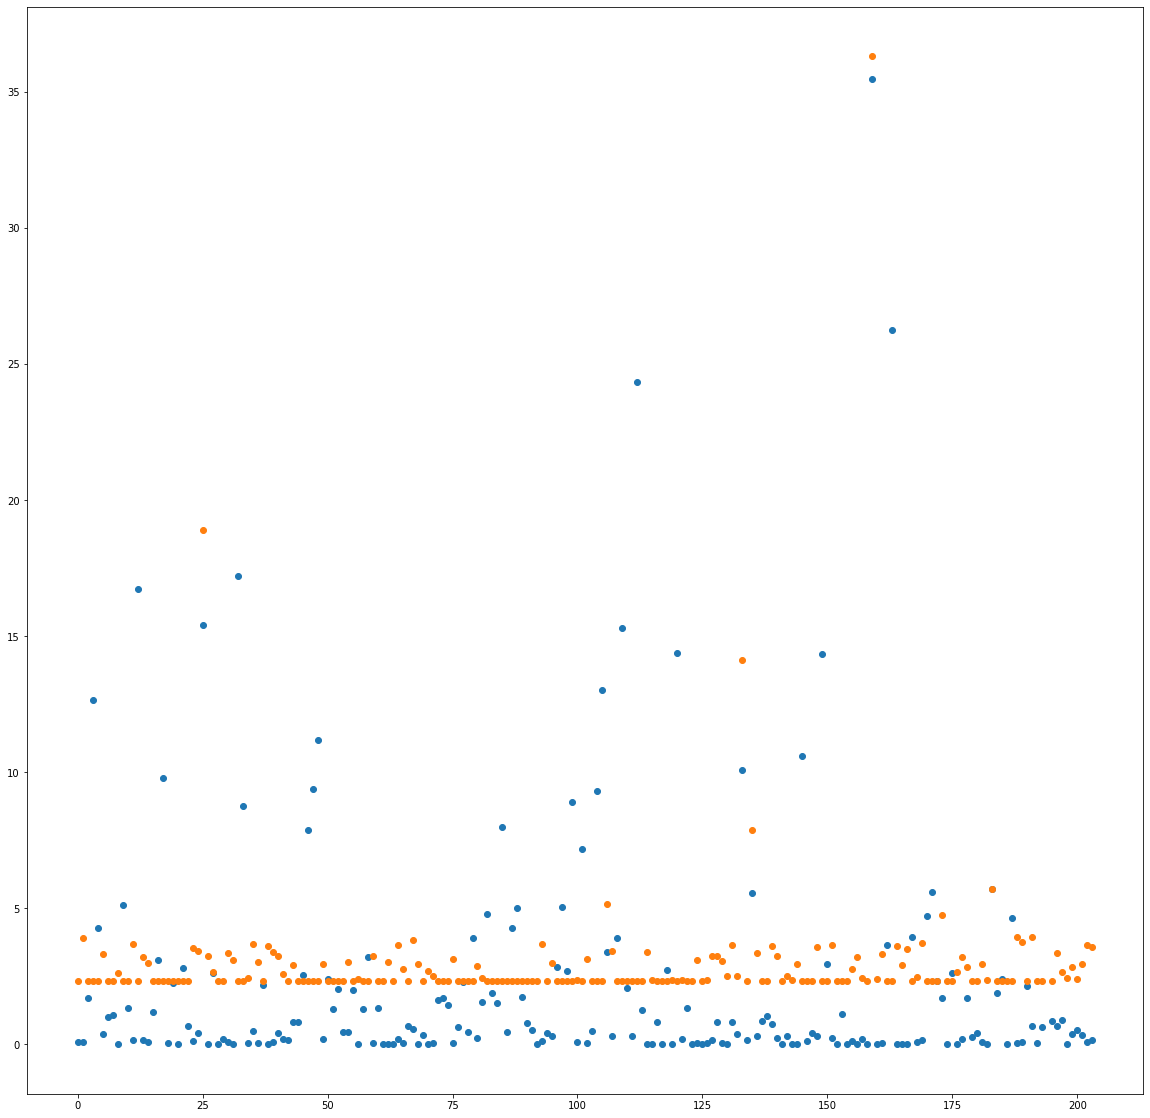

In [53]:
plt.figure(figsize=(20, 20))
plt.scatter(np.arange(0, len(annual_df)), annual_df["avg_value"])
# plt.hist(annual_df["avg_value"], bins=100, label="b", density=True)

for month_folder in glob("./data/earth_observation_group/monthly/2010/*"):
    for file in glob(month_folder+"/*"):
        if ".csv" in file:
            monthly_df = pd.read_csv(file)
            monthly_df.sort_values(by=["Region Code"], inplace=True)
            plt.scatter(np.arange(0, len(monthly_df)), monthly_df["avg_calibrated"])
#             plt.hist(monthly_df["avg_calibrated"], bins=100, label="r", density=True)
    break


plt.plot()

In [52]:
annual_df.head(4), monthly_df.head(4)

(    Region Code  annual_ntl_sum  avg_value
 123         AFG       155696.83   0.082416
 95          AGO       228631.52   0.093804
 58          ALB       130736.80   1.694184
 122         AND        15603.81  12.665430,
     Region Code  annual_ntl_sum  annual_ntl_sum_sq  calibrated_ntl_sum  \
 125         AFG             0.0                0.0        4.426302e+06   
 100         AGO       6847263.5         51586670.0        9.539484e+06   
 43          ALB             0.0                0.0        1.808046e+05   
 122         AND             0.0                0.0        2.886576e+03   
 
       avg_ntl  avg_calibrated  
 125  0.000000        2.343000  
 100  2.809314        3.913885  
 43   0.000000        2.343000  
 122  0.000000        2.343000  )

In [21]:
a = np.array([[1,2,3], [4,5,6]])

In [22]:
def test(a, c0, c1, c2):
    return c0 + c1*a + c2*(a**2)

In [40]:
vfunc = np.vectorize(test)
dn_values = np.arange(0, 64, 1)

In [41]:
coeffs_df = pd.read_csv("./data/Elvidge_DMSP_intercalib_coef.csv")

In [42]:
all_min, all_max = np.inf, -np.inf
for _, row in coeffs_df.iterrows():
    c0, c1, c2 = row[2:]
    all_min = min(all_min, np.min(vfunc(dn_values, c0, c1, c2)))
    all_max = max(all_max, np.max(vfunc(dn_values, c0, c1, c2)))

In [43]:
all_min, all_max

(-2.057, 65.39339999999999)

In [44]:
with open("./data/country_num_pixels.pkl", "rb") as f:
    country_pixels_data = pickle.load(f)

In [45]:
country_pixels_data["IDN"]

11147836

In [46]:
def rescale(value, all_min, all_max, num_pixels):
    if num_pixels is None:
        return None
    return (value - all_min*num_pixels)*63.0/(all_max - all_min)
    

In [47]:
ntl_df = pd.read_csv("./data/earth_observation_group/monthly/1992/04/countries_ntl_sum_F10.csv")
all_rescaled_values = []
all_avg_rescaled_values =  []
for _, row in ntl_df.iterrows():
    country_pixels = country_pixels_data[row["Region Code"]]
#     print(country_pixels)
    rescaled_value = rescale(row["calibrated_ntl_sum"], all_min, all_max, country_pixels)
    all_rescaled_values.append(rescaled_value)
    
    if country_pixels is None:
        all_avg_rescaled_values.append(None)
    else:
        all_avg_rescaled_values.append(round(rescaled_value)/country_pixels)
    
#     break
    

In [48]:
value = -1.35779e+07
num_pixels = 11147836
# value-all_min*num_pixels
value/num_pixels

-1.2179852663781563

In [49]:
ntl_df["rescaled_value"] = all_rescaled_values
ntl_df["avg_rescaled"] = all_avg_rescaled_values

In [50]:
ntl_df

,Region Code,annual_ntl_sum,annual_ntl_sum_sq,calibrated_ntl_sum,rescaled_value,avg_rescaled
0,IDN,6089137.5,36716416.00,-1.357799e+07,8.735986e+06,0.783649
1,MYS,1400513.5,15609166.00,-1.704655e+06,1.949069e+06,1.057453
2,CHL,3676299.0,26213852.00,-4.336801e+07,5.240311e+06,0.220083
3,BOL,3307478.5,14604980.00,3.460058e+05,4.790062e+06,2.060282
4,PER,3682053.5,18162950.00,-1.183378e+06,5.316536e+06,1.590596
...,...,...,...,...,...,...
199,BHR,0.0,0.00,-9.266785e+03,0.000000e+00,0.000000
200,PGA,32.0,78.76,-7.823924e+04,4.686982e+01,0.001235
201,BJN,0.0,0.00,-8.228000e+00,0.000000e+00,0.000000
202,SER,0.0,0.00,-8.228000e+00,0.000000e+00,0.000000


In [38]:
c0, c1, c2 = -2.057, 1.5903, -0.009
num_pixels = 11147836

In [39]:
new_val = c0*num_pixels + c1*(6089137.5) + c2*(36716416)
new_val

-13577991.029749997

In [84]:
gdp_df = pd.read_csv("./data/gdp/monthly_gdp_per_capita.csv")

In [85]:
a = gdp_df[gdp_df["Country Name"] == "India"]
a["1993_12"]

66    301.501195
Name: 1993_12, dtype: float64

In [86]:
y = a.iloc[0, 2:].values
x = np.arange(0, len(y))
colors = ['b']*len(y)

for idx in np.arange(11, 360, 12):
    colors[idx] = 'r'


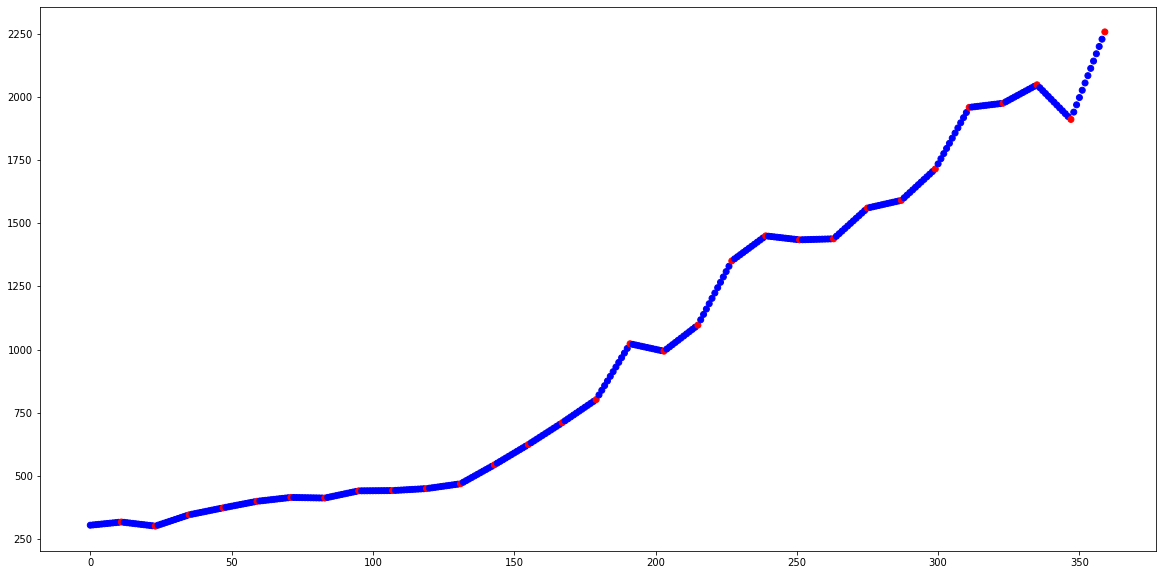

In [87]:
plt.figure(figsize = (20, 10))
plt.scatter(x, y, c=colors)

### Plot of log(NTL) vs log(GDP) per capita

In [29]:
def plot_ntl_vs_gdp(combined_df, is_viirs):
    years  = np.arange(2013, 2022, 1) if is_viirs else np.arange(1992, 2013, 1)
    
    ntl_columns = ["gdp_"+str(year) for year in years]
    gdp_columns = ["annual_ntl_sum_per_capita_"+str(year) for year in years]
    
    ntl_data = np.log(np.array(combined_df[ntl_columns]).flatten())
    gdp_data = np.log(np.array(combined_df[gdp_columns]).flatten())
    
    plt.xlabel("log(night time light per capita)")
    plt.ylabel("log(GDP per capita)")
    plt.scatter(ntl_data, gdp_data, c='g')
    plt.savefig("../data/pictures/ntl_vs_gdp_{}.png".format("viirs" if is_viirs else "dmsp_ols"), bbox_inches='tight')

In [32]:
df = pd.read_csv("../data/imf_data_combined_viirs.csv")
is_viirs = True

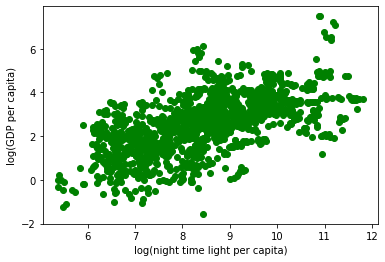

In [33]:
plot_ntl_vs_gdp(df, is_viirs=is_viirs)

In [7]:
df

,Region Code,gdp_1992,gdp_1993,gdp_1994,gdp_1995,gdp_1996,gdp_1997,gdp_1998,gdp_1999,gdp_2000,...,annual_ntl_sum_per_capita_2005,annual_ntl_sum_per_capita_2006,annual_ntl_sum_per_capita_2007,annual_ntl_sum_per_capita_2008,annual_ntl_sum_per_capita_2009,annual_ntl_sum_per_capita_2010,annual_ntl_sum_per_capita_2011,annual_ntl_sum_per_capita_2012,spi_category,centroid_category
0,AFG,247.458331,253.903207,205.235922,210.498997,238.199443,225.378489,225.475648,219.119702,236.327419,...,1.687730,1.486336,1.485248,1.298328,1.464391,2.015963,2.002379,2.096909,3,2
1,AGO,657.653384,442.445234,329.691784,398.120223,523.274940,514.309887,423.393453,387.689415,556.884244,...,1.817983,2.001921,2.083091,2.497926,2.917969,3.571728,3.563019,3.738458,3,1
2,ALB,200.852220,367.279225,586.416340,750.604449,1009.977275,717.380048,813.789397,1033.242532,1126.683340,...,14.710575,13.665868,14.001024,16.154379,14.948682,16.381252,17.991317,16.939387,2,2
3,ARE,25630.080973,25019.372358,25463.496289,27010.678186,28596.506829,28709.246921,25905.843384,27261.906573,31855.500605,...,76.078589,68.324113,58.659597,48.990310,42.326051,44.398151,46.033827,46.742316,1,2
4,ARG,6815.618290,6957.417499,7464.474737,7383.704510,7690.157003,8176.771195,8250.673174,7735.322080,7666.517834,...,27.207368,28.310242,27.555257,28.631063,29.725026,32.268672,32.389135,32.648222,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,WSM,779.174444,776.851911,1277.233772,1285.667010,1414.208183,1598.917862,1493.924235,1401.726669,1406.765683,...,4.751960,4.255266,3.716024,4.111857,4.586156,7.988369,6.637259,4.734145,2,1
152,YEM,447.814364,358.170121,267.942533,264.466191,348.234729,399.712718,359.217055,421.821225,518.148673,...,7.228131,7.028911,8.302234,8.301152,6.688724,9.096613,7.550168,6.281670,3,1
153,ZAF,3519.018571,3461.378400,3547.949750,3904.308092,3654.969254,3731.400789,3336.429991,3267.930610,3241.674475,...,18.960070,18.640959,18.274476,17.174877,17.786221,19.425340,18.919923,18.780025,2,2
154,ZMB,394.078398,395.752714,431.502778,438.393360,404.090461,471.171404,377.456332,353.833049,364.031294,...,3.223208,3.275368,3.075048,2.993028,3.207297,3.747330,3.554788,3.619498,2,1
